# DS 2500 
Module Assignment 3 - Data Gathering

For this assignment, I am going to be gathering data from a web application named SolarEdge which is a monitoring service for solar photovaultaic panels. They have both an api and a web interface for gathering data about the production of a system and the architecture of the equipment. I used their api to gather energy production information for module assignment 1, but their public facing api does not provide information about the architecture (size of panels, number of panels, angle etc) of the panels. Gathering data latter is the subject of interest for this assignment, but I am also going to be using the energy production dataset in my analysis. I would have liked to include the code for that data gathering, but it provides too much private information to share.

# Data Gathering

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Architecture data
Much of the information needed to gather this data is proprietary, so I am not going to reveal information about names, passwords, or locations. Unfortunately, SolarEdge requires authentication to login to their site (which has bot detection software), so I won't be able to put working code in a Colab notebook that can step by step retrieve the information I am looking for. However, all of the information that I need can actually be retrieved by making an api call (which is not part of their public facing api) as long as I pass it the right authentication and session tokens. I was able to generate valid authentication tokens during an actual browser session on my computer, and copy paste them into my request. Doing so allowed me to collect of the data I was interested in. For the purposes of this notebook, I have saved that data into a file named 'panel_architecture.csv'. I am going to leave the code in that was used to actually gather the data, but use the final dataset as the target for the EDA

I already have information about several different side ids from my proprietary access to the data. I am going to store them in an array to use for data gathering

In [30]:
site_ids = [
    103941,
    1232644,
    787197,
    238320,
    349060,
    477834,
    641826,
    896164,
    717193,
    627759,
    569932,
    466851,
    256177,
    505347
]

The get_system_data function is calling the api using a hardcoded csrf-token and cookie. This can only be obtained from a valid browser session, so running this without a recent session will most likely fail

In [21]:
import requests

def get_system_data(site_id):
    print(site_id)
    headers = {
        'x-csrf-token': '9BE73D63E9213DB5BA8FE051F2E888A5F4B08AB96CC1A42F80B7BE215423915DFABF855064028D81FC67A5A842C720078F11',
        'x-requested-with': 'XMLHttpRequest', 
        'cookie': 'JSESSIONID=23CE7B85676371F1DED6B8723B3E61E19408D2ECB6D4BB41BEE72C9197C661CCFB3AB1B53DE39DEEE773B5255068073E9193996B7D5F4DE061761AB6A38FB445; solaredge_cookie_concent=1; visid_incap_840553=7+Jmd7w1S7C6ZQiXZVRYuDOyCl4AAAAAQUIPAAAAAAC2pxmwgglHXVxVPgv+zFcY; _ga=GA1.2.1008163716.1579628848; __utmz=43987385.1580615578.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); _gcl_au=1.1.273123176.1580615810; __utma=43987385.1008163716.1579628848.1580615578.1580850839.2; _gid=GA1.2.1353508590.1582048188; SolarEdge_Client-1.6=83b7e022b997536faae6c8b780cd40cf423b50622ae62b4a6820d6f1bbb05b5b7aab002304e6ca4826301eb741a54f6ec117af9dd0188278dd8a8c2e7c3b6986be5ee72c692f314d81e3fea658e57dbd33ae4e92264d9fa3568323560e4b9e0d5d0e2577c1d5c0acac56b79bed994774615d223bdaeef353e7e0b748cfca43e37d985b8359fd84c27a01548f66085b0353fae0393fdf9f0ea1100c13dedb31ce9979cde8c9c88353fc607c2d977572dbe4368ff8571a3fd89105299dfb73bd853ffa44abf475714906f52ace5391d6ec5ad72fcbead798d27d02edbab681bd3e1ab23e0bd3593c38caac6b0ceba62d88d35ac535fcad8a55cabab03e1c3c00dbb2cc5c14da92c34d335a2d5b36f2ecf151c7ff7477922f05159a5dcec60010cf75b3e522690bc6793dff6ffedb68bcb9250638b90cf689625b1a1d3c4a5abeee3189087c6d5d65720093cd4bf1e6728a8f8e2797e08aee0a1e937665dda2947fbe33e5465816eb76a8909704631ecad1c64bf63b659816af0cf6501fdaf5ac392c041158a25494179e33d11ae642e60ada557069cc2d6b5e7acc71656e79d2f82f4a080c77d4a0d1b97269e294487e6039020d28f3d09de1b452a09109b694c616022d5ae6b0cd860e34eda779e335212e706fb27a76ec2e28375ecc5712f8499f04eb99ce71696f670c175dc1508c40bb456d75fb5a97cd957d21acd94390ec9f89bb37143167f3b8701af7b56d4b6fc48934d090a9b2d1421331d0fab14f47f8f368b4405a5cd66107d50500cfbc6ebefcb7e3bd79d6409baf46dcf42d3fccceb9f62c401f9ea383cf7853b355db172cfd17b041cc4eb2e86a2f8a4b30a048b5b9f34db2f02a4e114cf02b8059a343578a704e309f65af4a43347caa7c0dd27a59aefb38566b00726d0039d1b5d38259e078e17b640f97a2c8dfce2f3c55f3d8be77387e37c754270fb8ef81fab7e61f8d0bfc93ab619783006fda4695020d61ccbf90afe1f4ae5e9e0c5b9e115d851bbd1a9a5549f8cf5dc16be53e97c003e16e5837a3f51485628701bf203778eea55cb0463cddabc66cc0e91ee983ac47427ec5342d11d8225f9ccb6470181865e82cc37f3ca4da3df8c0839224167336267761f9ab07d6f2f9ab44d0e661019379d76ec6fa858a4ed8c1064cb0d15a3c33fdeb09f099c7c56083661321ae39d6e5c27b5fb0a2313b54275b5a1c822276a9250fdf25db18922418ac08fcf0a7c2b3a423b56bad37622fc73c6b307ed422a0fe090cb21c918fe973773f870d540fc41e9158ee7754c4923c05d2b3fed0ea800335c5bb2ef2a197b1a6a0d0bdebac9b065925cc2c94c3c04f15fc326d3881bc86e3008ad1090a2a076e660555cff21370e3afc84f843ba0e317fb78319d608c3705a8cfb403d0178b87274b535c9a782038c0f2eafead4e8b09c2671f508ddbb63ad737eb3852bf64a23fd394896868ffa422ccb59e91e62c101a27166b63dd4fe0055c03c0c2cb54b6e6843a622f6e783864a2767aa4385ad34280aa1626177cc9ee04caadda2f8218bf7da181944684fa2a7f4a0d38474f0dab0b91767c190af91f5641a8d59c268a3c7847232d6ff3549f419b8fafed60979d67e08bcd24618d117594b0665fa957968d706d86496e32701c3b481242bb69c3976211e8c97cb8f8085a3149f2e49214ca25715e7020167b3d30168d02a7250292b980dcd4010a42ec87f4362bd63acd28506d24; CSRF-TOKEN=11E698D7DB0705C984A0094303E4FD4B5EC8F74FD2DA47821BE40C5F480BDE0639DD7C6DE2C602134828D7EE4301462E0A05; SolarEdge_Locale=en_US; _gat=1; SolarEdge_Locale=en_US; SolarEdge_SSO-1.4=a4061b73866313d5e83fcf807c71b8b62b8b0a2ea653271e3ca40fb546c263f58ca308430e6dfe9f0742699724e15e13; SPRING_SECURITY_REMEMBER_ME_COOKIE=YWxhbmtrbnVkc29uQGhvdG1haWwuY29tOjM3Mjk1NzE1MjU2NjQ6NGViYmJjNGI4MzE3MzIyZWRlMzlkYTQ0ZTA0MDMwMDI; SolarEdge_Field_ID=1232644'
    }
    # this url was obtained by inspecting chromes developer tools to see what network activity 
    # was happening when I loaded a certain page in the application. I simply looked 
    # at the HTTP request headers that the browser was sending over to know which headers to 
    # add to the request
    url = f'https://monitoring.solaredge.com/solaredge-apigw/api/sites/{site_id}/layout/physical'
    response = requests.get(url, headers=headers)
    data = response.json()
    return data

Here I am getting data for a sample system id 103941 just to see what information is being returned

In [24]:
import json

data = get_system_data(103941)
print(json.dumps(data, indent=2))

103941
{
  "fieldId": 103941,
  "siteDimensions": {
    "vSpacing": 4.0,
    "hSpacing": 4.0,
    "dimensionMap": {
      "Inverter": {
        "width": 75.0,
        "height": 69.0
      },
      "Module": {
        "width": 60.0,
        "height": 90.0
      },
      "SMI": {
        "width": 81.0,
        "height": 60.0
      }
    }
  },
  "groups": [
    {
      "id": 1334105,
      "rectangle": {
        "x": 130.77,
        "y": 0.36,
        "height": 444.0,
        "width": 466.0,
        "azimuth": 180.0
      },
      "moduleOrientation": "HORIZONTAL",
      "moduleTilt": 10.0,
      "moduleWidth": 60.0,
      "moduleHeight": 90.0,
      "vSpacing": 4.0,
      "hSpacing": 4.0,
      "rows": 7,
      "columns": 5,
      "modules": [
        {
          "moduleId": 12504713,
          "row": 4,
          "column": 3,
          "id": 17962154,
          "inverterId": 17962133
        },
        {
          "moduleId": 12504705,
          "row": 3,
          "column": 1,
       

The following method, extract_panel_information, does the bulk of the work for data extraction. It takes in the raw data from the request, the site_id, and the site_name. It will then produce a data frame that contains all of the information from the request 

In [25]:
def extract_panel_information(data, site_id, site_name = 'Anonymous'):
    rows_data = []
    for group in data['groups']:
        groupid = group['id']
        x = group['rectangle']['x']
        y = group['rectangle']['y']
        height = group['rectangle']['height']
        width = group['rectangle']['width']        
        azimuth = group['rectangle']['azimuth']        
        moduleOrientation = group['moduleOrientation']
        moduleTilt = group['moduleTilt']
        moduleWidth = group['moduleWidth']
        moduleHeight = group['moduleHeight']
        vSpacing = group['vSpacing']
        hSpacing = group['hSpacing']
        rows = group['rows']
        columns = group['columns']
        for module in group['modules']:
            moduleId = module['moduleId']
            row =  module['row']
            column =  module['column']
            id =  module['id']
            inverterId =  module['inverterId']
            row = {
                'site_id': site_id, 
                'site_name': site_name,
                'group_id':groupid, 
                'x': x, 
                'y': y,
                'height': height, 
                'width': width, 
                'azimuth': azimuth,
                'module_orientation': moduleOrientation, 
                'module_tilt': moduleTilt, 
                'module_width': moduleWidth, 
                'module_height': moduleHeight,
                'vSpacing': vSpacing, 
                'hSpacing': hSpacing,
                'num_rows': rows,
                'num_columns': columns,
                'module_id': moduleId,
                'row': row,
                'column': column,
                'id': id,
                'inverterId': inverterId
            }
            rows_data.append(row)
    df = pd.DataFrame(rows_data)
    return df
#     return rows_data

This is a sample data frame for one of the systems. I'm using the name anonymous to store in the data frame. For my own purposes, I'll update this later to contain the actual name

In [27]:
df = extract_panel_information(data, 1232644, 'Anonymous' )
df.head()

,site_id,site_name,group_id,x,y,height,width,azimuth,module_orientation,module_tilt,...,module_height,vSpacing,hSpacing,num_rows,num_columns,module_id,row,column,id,inverterId
0,1232644,Anonymous,1334105,130.77,0.36,444.0,466.0,180.0,HORIZONTAL,10.0,...,90.0,4.0,4.0,7,5,12504713,4,3,17962154,17962133
1,1232644,Anonymous,1334105,130.77,0.36,444.0,466.0,180.0,HORIZONTAL,10.0,...,90.0,4.0,4.0,7,5,12504705,3,1,17962136,17962133
2,1232644,Anonymous,1334105,130.77,0.36,444.0,466.0,180.0,HORIZONTAL,10.0,...,90.0,4.0,4.0,7,5,12504720,0,2,17962149,17962133
3,1232644,Anonymous,1334105,130.77,0.36,444.0,466.0,180.0,HORIZONTAL,10.0,...,90.0,4.0,4.0,7,5,12504698,4,2,17962162,17962133
4,1232644,Anonymous,1334105,130.77,0.36,444.0,466.0,180.0,HORIZONTAL,10.0,...,90.0,4.0,4.0,7,5,12504709,2,2,17962148,17962133


Loop through every system id, get it's associated data frame, and concat them all together. This method should take a little while to run

In [29]:
dfs = []
for site_id in site_ids:
#     print(id, name)
    request_data = get_system_data(site_id)
    df = extract_panel_information(request_data, site_id)
    dfs.append(df)

df = pd.concat(dfs)
df

103941
1232644
787197
238320
349060
477834
641826
896164
717193
627759
569932
466851
256177
505347


,site_id,site_name,group_id,x,y,height,width,azimuth,module_orientation,module_tilt,...,module_height,vSpacing,hSpacing,num_rows,num_columns,module_id,row,column,id,inverterId
0,103941,Anonymous,1334105,130.77,0.36,444.0,466.0,180.0,HORIZONTAL,10.0,...,90.0,4.0,4.0,7,5,12504711,3,2,17962147,17962133
1,103941,Anonymous,1334105,130.77,0.36,444.0,466.0,180.0,HORIZONTAL,10.0,...,90.0,4.0,4.0,7,5,12504694,1,2,17962146,17962133
2,103941,Anonymous,1334105,130.77,0.36,444.0,466.0,180.0,HORIZONTAL,10.0,...,90.0,4.0,4.0,7,5,12504706,6,0,17962159,17962133
3,103941,Anonymous,1334105,130.77,0.36,444.0,466.0,180.0,HORIZONTAL,10.0,...,90.0,4.0,4.0,7,5,12504696,3,0,17962138,17962133
4,103941,Anonymous,1334105,130.77,0.36,444.0,466.0,180.0,HORIZONTAL,10.0,...,90.0,4.0,4.0,7,5,12504715,5,0,17962160,17962133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,505347,Anonymous,10943098,341.34,781.60,90.0,2300.0,180.0,VERTICAL,0.0,...,90.0,4.0,4.0,1,36,129943310,0,25,47222777,47222771
212,505347,Anonymous,10943098,341.34,781.60,90.0,2300.0,180.0,VERTICAL,0.0,...,90.0,4.0,4.0,1,36,129943314,0,17,47222802,47222771
213,505347,Anonymous,10943098,341.34,781.60,90.0,2300.0,180.0,VERTICAL,0.0,...,90.0,4.0,4.0,1,36,129943330,0,20,47222794,47222771
214,505347,Anonymous,10943098,341.34,781.60,90.0,2300.0,180.0,VERTICAL,0.0,...,90.0,4.0,4.0,1,36,129943335,0,10,47222781,47222771


Write the final data frame to a csv, which holds the panel architecture information about every account. This is the data set we will use for the EDA

In [16]:
df.to_csv('panel_architecture.csv', index=False)

# EDA

## 1. Formulate your questions
I would like to know if there is a linear relationship between the surface area of a solar panel system, and the average daily outpute of the system. To answer this question I am going to produce a few visualizations and compute the pearson correlation coefficient using both the panel architecture data set gathered above, and an energy production data set that was previously gathered. 

## 2. Read in your data
This is the data set that we gathered in the previous section

In [57]:
architecture_df = pd.read_csv('panel_architecture.csv')

The following is the data set that I have already gathered, that consists of the production of each system at 15 minute time increments. When I gathered the data set, I put them all in separate csv files. I am going to have to do some combination to get all of the data into one data frame with the site ids.

In [58]:
import pandas as pd
import os

data_frames = {}

for _, dirs, __ in os.walk('school_data'):
    for d in dirs:
        for _, ___, files in os.walk(f'school_data/{d}'):
            df_list = []
            for file in files:
                df = pd.read_csv(f'school_data/{d}/{file}')
                df_list.append(df)
            system_df = pd.concat(df_list)
            data_frames[d] = system_df

## Part 3. Check the packaging

In [59]:
architecture_df.shape

(1080, 21)

In [60]:
for key, frame in data_frames.items():
    print(frame.shape)

(81312, 2)
(129216, 2)
(52608, 2)
(107520, 2)
(173568, 2)
(53952, 2)
(78816, 2)
(61536, 2)
(68352, 2)
(70560, 2)
(15456, 2)
(101952, 2)
(100704, 2)
(42432, 2)


## Part 4. Look at the top and bottom of data

In [61]:
architecture_df

,site_id,site_name,group_id,x,y,height,width,azimuth,module_orientation,module_tilt,...,module_height,vSpacing,hSpacing,num_rows,num_columns,module_id,row,column,id,inverterId
0,103941,Anonymous,1334105,130.77,0.36,444.0,466.0,180.0,HORIZONTAL,10.0,...,90.0,4.0,4.0,7,5,12504693,6,4,17962171,17962133
1,103941,Anonymous,1334105,130.77,0.36,444.0,466.0,180.0,HORIZONTAL,10.0,...,90.0,4.0,4.0,7,5,12504701,5,2,17962142,17962133
2,103941,Anonymous,1334105,130.77,0.36,444.0,466.0,180.0,HORIZONTAL,10.0,...,90.0,4.0,4.0,7,5,12504716,2,3,17962155,17962133
3,103941,Anonymous,1334105,130.77,0.36,444.0,466.0,180.0,HORIZONTAL,10.0,...,90.0,4.0,4.0,7,5,12504700,4,1,17962153,17962133
4,103941,Anonymous,1334105,130.77,0.36,444.0,466.0,180.0,HORIZONTAL,10.0,...,90.0,4.0,4.0,7,5,12504709,2,2,17962148,17962133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,505347,Anonymous,10943098,341.34,781.60,90.0,2300.0,180.0,VERTICAL,0.0,...,90.0,4.0,4.0,1,36,129943316,0,13,47222810,47222771
1076,505347,Anonymous,10943098,341.34,781.60,90.0,2300.0,180.0,VERTICAL,0.0,...,90.0,4.0,4.0,1,36,129943332,0,16,47222802,47222771
1077,505347,Anonymous,10943098,341.34,781.60,90.0,2300.0,180.0,VERTICAL,0.0,...,90.0,4.0,4.0,1,36,129943323,0,1,47222805,47222771
1078,505347,Anonymous,10943098,341.34,781.60,90.0,2300.0,180.0,VERTICAL,0.0,...,90.0,4.0,4.0,1,36,129943340,0,2,47222783,47222771


This data has each of the systems in different data frames. The data is fairly simple. It has a timestamp and a corresponding value. We'll have to change the index to be the date column when we use the data later

In [62]:
for key, frame in data_frames.items():
    print(frame)

                     date  value
0     2018-02-01 00:00:00    NaN
1     2018-02-01 00:15:00    NaN
2     2018-02-01 00:30:00    NaN
3     2018-02-01 00:45:00    NaN
4     2018-02-01 01:00:00    NaN
...                   ...    ...
2875  2019-06-30 22:45:00    0.0
2876  2019-06-30 23:00:00    0.0
2877  2019-06-30 23:15:00    0.0
2878  2019-06-30 23:30:00    0.0
2879  2019-06-30 23:45:00    0.0

[81312 rows x 2 columns]
                     date  value
0     2018-02-01 00:00:00    NaN
1     2018-02-01 00:15:00    NaN
2     2018-02-01 00:30:00    NaN
3     2018-02-01 00:45:00    NaN
4     2018-02-01 01:00:00    NaN
...                   ...    ...
2875  2019-06-30 22:45:00    0.0
2876  2019-06-30 23:00:00    0.0
2877  2019-06-30 23:15:00    0.0
2878  2019-06-30 23:30:00    0.0
2879  2019-06-30 23:45:00    0.0

[129216 rows x 2 columns]
                     date  value
0     2019-01-01 00:00:00    0.0
1     2019-01-01 00:15:00    0.0
2     2019-01-01 00:30:00    0.0
3     2019-01-01 00:45:

## 5. Check the "n"s
For the architecture dataset, I am interested to see information about the columns having to do with the module tilt, orientation, azimuth, and size

Here I am creating a new row named area which is the area of a single module. Simply multiplying the module height by the module width. Surprisingly, every module has the same area. It's important not to confuse this with the area of an entire system, which we will get by adding all of the areas of a systems individual panels

In [63]:
architecture_df['module_area'] = architecture_df.apply(lambda row: row['module_width'] * row['module_height'], axis =1)
architecture_df['module_area'].value_counts()

5400.0    1080
Name: module_area, dtype: int64

Every module has the same height and width

In [64]:
print(architecture_df['module_width'].value_counts())
print(architecture_df['module_height'].value_counts())

60.0    1080
Name: module_width, dtype: int64
90.0    1080
Name: module_height, dtype: int64


Get the value counts for the module orientation, which will either be horizontal or vertical

In [65]:
architecture_df['module_orientation'].value_counts()

VERTICAL      665
HORIZONTAL    415
Name: module_orientation, dtype: int64

The azimuth corresponds to what angle the panel is facing towards the sun. Here we can see that the majority of the panels are facing south (180) degress, which is what we would expect

In [66]:
architecture_df['azimuth'].value_counts()

180.0    797
270.0    196
90.0      52
149.0     34
148.0      1
Name: azimuth, dtype: int64

Just for kicks, I'm interested to see what the ratio of horizontal to vertical panels is

In [67]:
groups = architecture_df.groupby('site_id')
ratios = []
for group in groups:
    group_df = group[1]
    counts = group_df['module_orientation'].value_counts()
    vertical = counts['VERTICAL'] if 'VERTICAL' in counts.index else 0
    horizontal = counts['HORIZONTAL'] if 'HORIZONTAL' in counts.index else 0
    ratio = vertical / horizontal
    ratios.append(ratio)
print(ratios)

[0.0, inf, 3.125, 4.0, inf, inf, inf, inf, 1.0666666666666667, 0.8333333333333334, 0.0, 0.0, inf, inf]


/Users/richardtimpson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  


For the production data, I am going to do the same check for step 5 that I did in assignment. Here, I am looking at the total number of months for each system, and outputting the total energy output of the system

In [68]:
for key, df in data_frames.items():
    # need to set the index of each data frame to be the date and convert to a datetime object
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    grouper = df.groupby(pd.Grouper(freq='M'))
    print(f'System {key}')
    print(f'\t# of Months: {len(grouper.groups)}')
    production = df['value'].sum()
    print(f'\tTotal production: {production * 1/1000} kWh')

System 505347
	# of Months: 29
	Total production: 282016.8791711047 kWh
System 256177
	# of Months: 45
	Total production: 148038.71661221999 kWh
System 787197
	# of Months: 19
	Total production: 41891.385 kWh
System 349060
	# of Months: 38
	Total production: 49237.903 kWh
System 103941
	# of Months: 60
	Total production: 82464.9261676807 kWh
System 238320
	# of Months: 20
	Total production: 19768.760410873427 kWh
System 569932
	# of Months: 28
	Total production: 113669.861 kWh
System 717193
	# of Months: 22
	Total production: 176414.59 kWh
System 641826
	# of Months: 24
	Total production: 111488.898 kWh
System 627759
	# of Months: 25
	Total production: 91170.333 kWh
System 1232644
	# of Months: 6
	Total production: 5941.981 kWh
System 466851
	# of Months: 36
	Total production: 26236.14 kWh
System 477834
	# of Months: 35
	Total production: 5963.917 kWh
System 896164
	# of Months: 15
	Total production: 14148.444 kWh


## 6. Validate against an external data source

### Architecture data
For the architecture data, I am going to verify by pulling up the SolarEdge application and looking at their graphical representation of a single panel system. I'll do this for the system id number 103941. The following image shows the representation. To verify, I am going to count the number of panels for the system, the number of groups, and the number of horizontal panels (which should be all of them). According to the image, there are 33 panels![Graphical Representation](layout.png)

In [69]:
system_df = architecture_df[architecture_df['site_id'] == 103941]

In [70]:
system_df.shape

(33, 22)

In [71]:
system_df['group_id'].nunique()

1

In [72]:
system_df['module_orientation'].value_counts()

HORIZONTAL    33
Name: module_orientation, dtype: int64

### Production data
For the production data, I am going to use the same method I did for assignment 1

A quick google search reveals that a home uses on avearge 37kWh in a day. From my background knowledge, I know that some of the systems are residential, and some are commercial. This means that for some of the systems, they should be producing roughly 37kWh a day if we make the assumption that they are producing energy to sustain a household. The commercial systems should produce numbers higher, but it's more difficult to get any estimate on what that number should be. That means we'll need to group the data by day, get the total power output, and then divide that by the number of days to get production per day (we'll need to change Wh to kWh). 

Getting the average production per day is also going to be useful when we do our test, so I am going to save that information

In [73]:
avg_daily_prod = {}

for key, df in data_frames.items():
    # need to set the index of each data frame to be the date and convert to a datetime object
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    grouper = df.groupby(pd.Grouper(freq='D'))
    print(f'System {key}')
    num_days = len(grouper.groups)
    print(f'\t# of Days: {num_days}')
    production = df['value'].sum()
    production_per_day = production / num_days * 0.001
    print(f'\tTotal production: {production} Wh')
    print(f'\tAverage production per day: { production_per_day} kWh')
    avg_daily_prod[key] = production_per_day

System 505347
	# of Days: 847
	Total production: 282016879.17110467 Wh
	Average production per day: 332.9597156683644 kWh
System 256177
	# of Days: 1346
	Total production: 148038716.61222 Wh
	Average production per day: 109.98418767624071 kWh
System 787197
	# of Days: 548
	Total production: 41891385.0 Wh
	Average production per day: 76.44413321167883 kWh
System 349060
	# of Days: 1120
	Total production: 49237903.0 Wh
	Average production per day: 43.962413392857144 kWh
System 103941
	# of Days: 1808
	Total production: 82464926.1676807 Wh
	Average production per day: 45.61113172991189 kWh
System 238320
	# of Days: 562
	Total production: 19768760.410873428 Wh
	Average production per day: 35.17573026845806 kWh
System 569932
	# of Days: 821
	Total production: 113669861.0 Wh
	Average production per day: 138.4529366626066 kWh
System 717193
	# of Days: 641
	Total production: 176414590.0 Wh
	Average production per day: 275.21776911076444 kWh
System 641826
	# of Days: 712
	Total production: 1114

## 7. Make a plot
The first plot I am going to create is a simple plot to visualize what the average production per day is

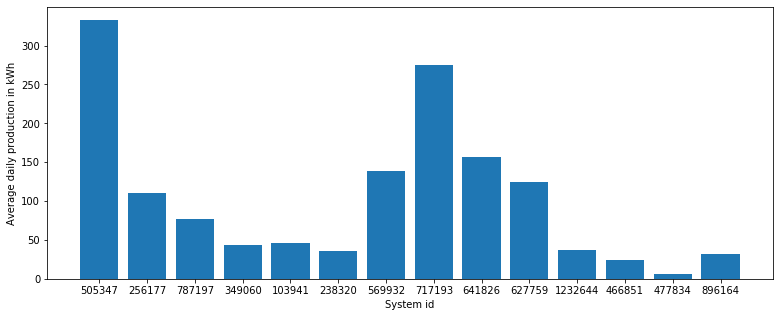

In [74]:
plt.rcParams['figure.figsize'] = (13,5)

plt.bar(range(len(avg_daily_prod)), avg_daily_prod.values(), width=0.8)
plt.xticks(range(len(avg_daily_prod)), avg_daily_prod.keys())
plt.xlabel("System id")
plt.ylabel("Average daily production in kWh")
plt.show()

The next plot I am interested in seeing will visually answer my overall question. I would like to see the panel surface area of the entire system on the x-axis, and the average daily production on the y-axis. First, we need to calculate the surface area of all of the systems, append that the dictionary with the average daily production, and then make a new data frame with the data

In [75]:
architecture_df['module_area']

0       5400.0
1       5400.0
2       5400.0
3       5400.0
4       5400.0
         ...  
1075    5400.0
1076    5400.0
1077    5400.0
1078    5400.0
1079    5400.0
Name: module_area, Length: 1080, dtype: float64

In [76]:
total_area = architecture_df.groupby('site_id')['module_area'].sum()
total_area = total_area.to_frame()
total_area

,module_area
site_id,
103941,178200.0
238320,124200.0
256177,712800.0
349060,189000.0
466851,162000.0
477834,75600.0
505347,1166400.0
569932,556200.0
627759,502200.0


In [77]:
total_area['avg_daily_prod'] = avg_daily_prod

In [78]:
# total_area['module_area'] = pd.to_numerica(total_area['module_area'])
total_area['avg_daily_prod'] = pd.to_numeric(total_area['avg_daily_prod'])
total_area

,module_area,avg_daily_prod
site_id,,
103941,178200.0,505347
238320,124200.0,256177
256177,712800.0,787197
349060,189000.0,349060
466851,162000.0,103941
477834,75600.0,238320
505347,1166400.0,569932
569932,556200.0,717193
627759,502200.0,641826


Now that we have the data in the correct format, we can look at the graph. It is showing an almost linear relationship between the two values, which is what I expected there to be. We can now look at the actual correlation coefficient in the next section. 

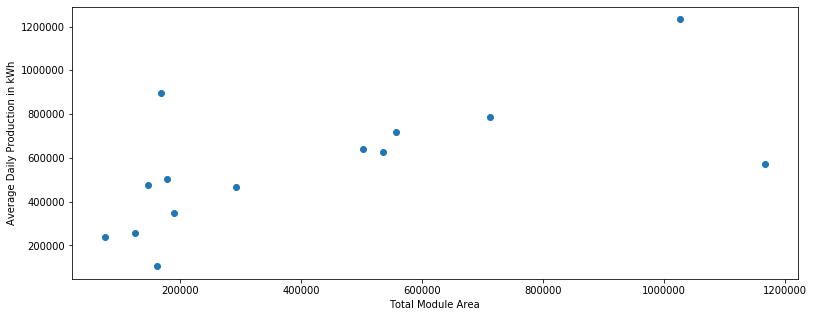

In [79]:
plt.xlabel("Total Module Area")
plt.ylabel("Average Daily Production in kWh")
plt.scatter(x = total_area['module_area'], y =total_area['avg_daily_prod'])

## Part 8 Try an easy solution
Because I am testing for a linear relationship between two continuous variables, I want to use the Pearson Correlation Coefficient to perform the analysis. 

In [80]:
from scipy.stats import pearsonr

stat, p = pearsonr(total_area['module_area'], total_area['avg_daily_prod'])
print(f'rho value: {stat}')
print(f'p value: {p}')

rho value: 0.6354032316070456
p value: 0.01460918087674938


# Writeup

Overall, I was pleased with the way this experiment turned out. The genesis of this questions comes from a bigger project that I am working on that is an exploration of the output of solar PV panel systems. I am trying to learn all that I can about what factors play into the final energy output of a given system. The question that I am asking (whether or not there is a linear relationship between the system size and production) is simplistic and makes intuitive sense, but is important to verify. It could be the case the output increases quadratically or logarithmically for any number of reasons. 

The data source to answer the question is as a good a source as I think exists. There is one public data source that gives something close to the information I was looking for, but is a little bit more difficult to access. I do have proprietary access to the information presented here, so interfacing with a legit company like SolarEdge made things much easier. I was afraid that I was going to have to actually scrape a webpage to get information about the panel architecture, but I was able to find an easy hack by simply exploring the network requests that asychronously obtain the data, and use information from my browser session to access the internal api. It did take me a few try's to know what information I needed to send in my request, but with my domain knowledge of web application development, it was a short process. Python's request library is simple enough that the data gathering was for the most part easy. 

The production data actually comes from a public facing SolarEdge monitoring api so I didn't have to perform any hacks to programitcally obtain it. I initially gathered it at the start of Assignment 1, and it is a dataset than I plan on using for many other purposes. Pulling it in to compare with the data I gathered for this module turned out well, and is a theme that I will probably use for the rest of the semester. The data does serve its purpose well for an initial exploration, but is lacking in terms of its size and variability. To answer the question more confidently, it would be better to have a much larger number of systems across many natioanl (and even international) states. This data is confined only to locations in the southweast. 

The actual test of the two datasets was simple as well. I did first have to mess with both datasets to get the aggregate outputs of the total area and average daily production, but there wasn't anything complicated in terms of data cleaning, reshaping, or resampling. I'm getting to the point where my knowledge of Pandas is somewhat sophisticated, so performing simple tasks like this are much easy now than they were at the beginning of the semester. I used scipy's pearson coefficient test function to conduct my experiment. At first, I didn't understand much what the function is doing, but upon further investigation, I discovered that it obtains it's p-value by performing a two-tailed significance level test. The null hypothesis for the pearson test is (where $\rho$ is the correlation coefficient) $$H_0: \rho = 0$$ The alternative hypothesis is $$ H_1: \rho \neq 0$$
This is where the two-tailed test comes from, because its a $\neq$ as opposed to > or <. 

For my test, I want to choose a significance level of 5%, which is a fairly standard level. 5% makes sense to me for this data because there are a great number of factors that play into energy production, so I know there needs to be room for error. The results showed that $\rho = 0.6354032316070456$ and that $p = 0.01460918087674938$. Because the p-value was under my significance level, that means that I can safely reject the null hypothesis, and conclude that the given $\rho$ coefficient is valid. A 64% correlation is actually a decent correlation at least in my eyes, especially given the small number of systems. 

There are some limits to my tests however. The pearson correlation coefficient test assumes an underlying normal distribution for both variables. I am not convinced that either variable (system size and system daily production), is normally distributed. There's a good chance that they are, but it would worth verification. Instead of using the pearson coefficient, I could have used either the Spearman's or Kendall's rank correlation tests, which don't assume normality. I think going forward I will actually conduct these tests, but for now, the current will suffice. 

I'm feeling much better about this assignment as opposed to the others because I tried as best as possible to approach the problem with a specific stastical problem in mind, and it helped give me direction to narrow down the work I needed to do. I'm getting a more solid understanding of statistics as I move along the course, and it's been difficult but enlightening to shift my perspective of analyzing problems under that framework. I'm excited to continue forward with the other projects for the course, and plan to continue to answer more specific questions in relation to the bigger problem that I am trying to solve. 